<span style="font-size:30px;">[Task 4] Data Cleaning and Insight Generation from Survey
Data.</span>

<span style="font-size:20px;">STEP.1    LOAD & INSPECT.</span>

In [9]:
import pandas as pd

df = pd.read_csv(r"/Users/jojo/elevvo internship/Task 4/kaggle_survey_2017_2021.csv", low_memory=False, encoding="latin1")

In [10]:
df.shape

(106302, 293)

In [13]:
df.columns

Index(['ï»¿-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       ...
       'Q38_B_Part_1', 'Q38_B_Part_2', 'Q38_B_Part_3', 'Q38_B_Part_4',
       'Q38_B_Part_5', 'Q38_B_Part_6', 'Q38_B_Part_7', 'Q38_B_Part_9',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=293)

In [14]:
df.head()

,ï»¿-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,BachelorÃ¢â¬â¢s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,MasterÃ¢â¬â¢s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,MasterÃ¢â¬â¢s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-size:20px;">Step 2: Handle Missing Values & Duplicates.</span>

In [16]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop columns with more than 80% missing
threshold = 0.8
df = df.dropna(axis=1, thresh=int((1-threshold)*len(df)))

print("New shape:", df.shape)

New shape: (101846, 44)


<span style="font-size:20px;">Step 3: Clean Formatting.</span>

In [18]:
# Clean column names
df.columns = [str(c).strip().replace(" ", "_").replace("/", "_") for c in df.columns]

# Strip whitespace in text columns
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].apply(lambda col: col.str.strip())

<span style="font-size:20px;">Step 4: Standardize Categories.</span>

In [21]:
import re
import numpy as np

def clean_gender(x):
    if pd.isna(x): return np.nan
    s = str(x).lower()
    if 'male' in s or s == 'man': return 'Male'
    if 'female' in s or s == 'woman': return 'Female'
    if 'non' in s or 'genderqueer' in s: return 'Non-binary/Other'
    if 'prefer not' in s: return 'Prefer not to say'
    return s.title()

def clean_experience(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().replace('years','').replace('year','').strip()
    if '<' in s or 'less' in s: return '<1'
    if re.search(r'1[\s\-to]*2', s): return '1-2'
    if re.search(r'3[\s\-to]*5', s): return '3-5'
    if re.search(r'5[\s\-to]*10', s): return '5-10'
    if re.search(r'10[\s\-to]*20', s): return '10-20'
    if '+' in s or '20' in s: return '20+'
    return s

# Apply cleaning
if 'Q2' in df.columns:
    df['gender_clean'] = df['Q2'].apply(clean_gender)
if 'Q6' in df.columns:
    df['experience_clean'] = df['Q6'].apply(clean_experience)

<span style="font-size:20px;">Step 5: Encode Categorical Variables.</span>

In [22]:
categorical_cols = ['gender_clean', 'experience_clean', 'Q3']  # Q3 = Country
enc_mappings = {}

for col in categorical_cols:
    df[col] = df[col].fillna('Missing')
    codes, uniques = pd.factorize(df[col])
    df[col+'_enc'] = codes
    enc_mappings[col] = dict(enumerate(uniques))

enc_mappings

{'gender_clean': {0: 'What Is Your Gender? - Selected Choice',
  1: 'Male',
  2: 'Female',
  3: 'Non-binary/Other',
  4: 'Prefer not to say',
  5: 'Prefer To Self-Describe',
  6: 'A Different Identity',
  7: 'Missing'},
 'experience_clean': {0: 'for how many  have you been writing code and/or programming?',
  1: '5-10',
  2: '20+',
  3: '1-3',
  4: '<1',
  5: '3-5',
  6: '10-20',
  7: 'i have never written code',
  8: '1-2',
  9: 'Missing',
  10: 'i have never written code but i want to learn',
  11: '30-40',
  12: 'i have never written code and i do not want to learn',
  13: 'more than 10',
  14: '6 to 10',
  15: "i don't write code to analyze data"},
 'Q3': {0: 'In which country do you currently reside?',
  1: 'India',
  2: 'Indonesia',
  3: 'Pakistan',
  4: 'Mexico',
  5: 'Russia',
  6: 'Turkey',
  7: 'Australia',
  8: 'Nigeria',
  9: 'Greece',
  10: 'Belgium',
  11: 'Japan',
  12: 'Egypt',
  13: 'Singapore',
  14: 'Brazil',
  15: 'Poland',
  16: 'China',
  17: 'Iran, Islamic Republ

<span style="font-size:20px;">Step 6: Generate Insights.</span>

In [27]:
#1. Gender distribution
print("Gender distribution:")
print(df['gender_clean'].value_counts())

Gender distribution:
gender_clean
Male                                      91148
Female                                     8768
Prefer not to say                          1276
Prefer To Self-Describe                     224
Non-binary/Other                            214
A Different Identity                        153
Missing                                      62
What Is Your Gender? - Selected Choice        1
Name: count, dtype: int64


#2. Top 10 countries
print("\nTop countries:")
print(df['Q3'].value_counts().head(10))

In [31]:
#3. Experience distribution
print("\nExperience distribution:")
print(df['experience_clean'].value_counts())


Experience distribution:
experience_clean
<1                                                              19395
3-5                                                             18587
1-2                                                             16576
Missing                                                         11871
5-10                                                             9683
1-3                                                              7874
10-20                                                            6064
20+                                                              4148
i have never written code                                        3021
more than 10                                                     1695
6 to 10                                                          1385
i have never written code but i want to learn                     821
i don't write code to analyze data                                567
30-40                                          

<span style="font-size:30px;">BONUS TASKS.</span>

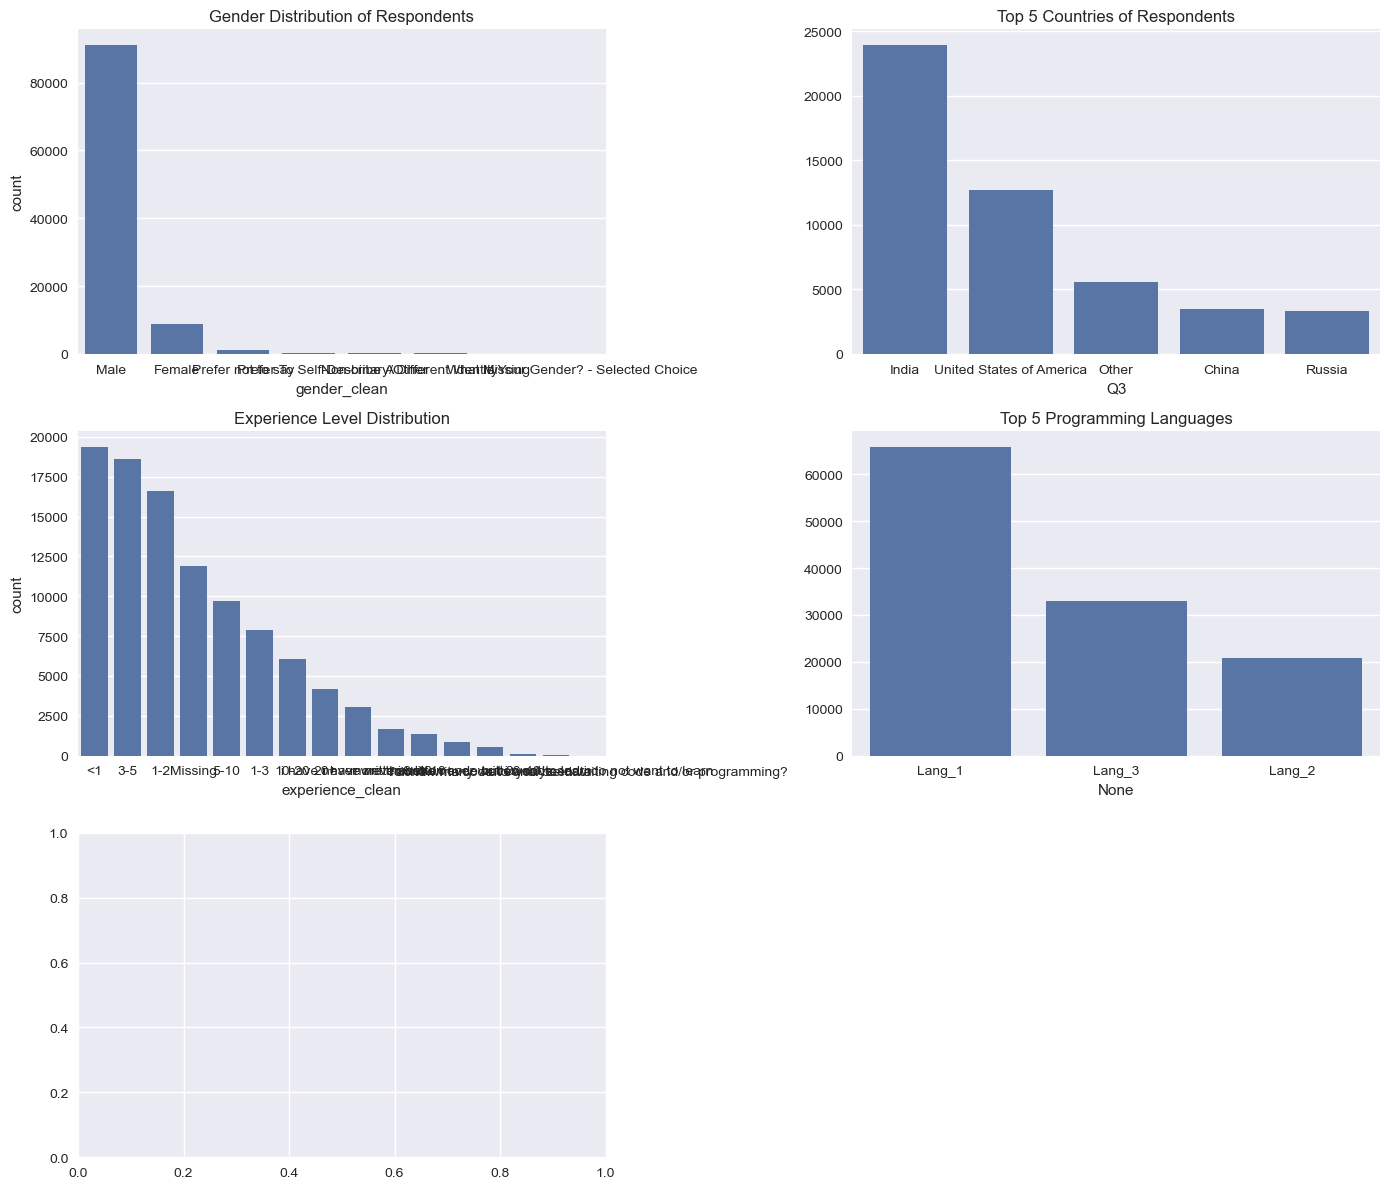

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# --- Insight 1: Gender Distribution ---
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

sns.countplot(x="gender_clean", data=df, order=df['gender_clean'].value_counts().index, ax=axes[0])
axes[0].set_title("Gender Distribution of Respondents")

# --- Insight 2: Top 5 Countries ---
top_countries = df['Q3'].value_counts().head(5)
sns.barplot(x=top_countries.index, y=top_countries.values, ax=axes[1])
axes[1].set_title("Top 5 Countries of Respondents")

# --- Insight 3: Years of Experience ---
sns.countplot(x="experience_clean", data=df, order=df['experience_clean'].value_counts().index, ax=axes[2])
axes[2].set_title("Experience Level Distribution")

# --- Insight 4: Programming Language Preference (if column exists) ---
if 'Q7_Part_1' in df.columns:
    langs = [col for col in df.columns if "Q7_Part" in col]  # multi-choice
    lang_counts = df[langs].notna().sum().sort_values(ascending=False).head(5)
    sns.barplot(x=lang_counts.index.str.replace("Q7_Part_","Lang_"), y=lang_counts.values, ax=axes[3])
    axes[3].set_title("Top 5 Programming Languages")

# --- Insight 5: Compensation (if available) ---
if 'Q9' in df.columns:
    comp = df['Q9'].value_counts().head(5)
    sns.barplot(x=comp.index, y=comp.values, ax=axes[4])
    axes[4].set_title("Top 5 Compensation Ranges")

# Remove empty subplot if unused
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()